In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('4liver.csv', delimiter = ',')

Вывод первых 20 строк. Данный датасет отображает данные по заболеваемости печени у людей разного возраста и пола. Датасет содержит данные о возрасте пациентов, его поле, общем и прямом билирубине, щелочной фосфатазе, аламиноаминотрансферазе, аспартитиминотрансферазе, общем количестве белков, альбумине, соотношении альбуминов и глобулинов и столбец для определения наблюдается ли данный пациент с заболеванием печени или нет.

In [3]:
df.head(20)

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290.0,53,58,6.8,3.4,1.00,1


Вывод столбцов датафрейма

In [4]:
df.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset123'],
      dtype='object')

Перевод столбцов в нижний регистр

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['age', 'gender', 'totalbilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'dataset123'],
      dtype='object')

Изменение названия столбца Dataset123, так как данное название не отображает сути представленных в нем данных
Также было изменено название столбца totalbilirubin, так как отсутствовало нижнее подчеркивание между 2 словами total_bilirubin

In [7]:
df = df.rename(columns={'dataset123': 'purpose'})
df = df.rename(columns={'totalbilirubin': 'total_bilirubin'})

Поиск и удаление пропусков
Так как количество строк, имеющие пропуски, является незначительным, то можно просто удалить эти строки

In [8]:
df.isna().sum()

age                           0
gender                        0
total_bilirubin               2
direct_bilirubin              0
alkaline_phosphotase          1
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
purpose                       0
dtype: int64

In [9]:
df = df.dropna(subset=['total_bilirubin', 'alkaline_phosphotase', 
                       'albumin_and_globulin_ratio'])

In [10]:
df.isna().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
purpose                       0
dtype: int64

Выявление и удаление явных дубликатов. Производится удаление строк, которые полностью повторяют уже встречавшиеся в датасете.
После удаления явных дубликатов стоит обновить индексацию, чтобы в ней не осталось пропусков. При использовании метода reset_index() индексы становятся новой колонкой с названием index и все строки получают новые индексы без пропусков.

In [11]:
df.duplicated().sum()

15

In [12]:
df = df.drop_duplicates()

In [13]:
df.drop_duplicates().reset_index()

,index,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,purpose
0,0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
560,579,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.10,1
561,580,52,Male,0.8,0.2,245.0,48,49,6.4,3.2,1.00,1
562,581,31,Male,1.3,0.5,184.0,29,32,6.8,3.4,1.00,1
563,582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2


In [14]:
df.duplicated().sum()

0

Выявление и удаление неявных дубликатов
В столбце gender была опечатка в слове Mal, слово было исправлено на Male
В столбце purpose был добавлен лишний параметр yes, поэтому он был заменен на 1
В столбце aspartate_aminotransferase была выявлена опечатка в числовом значении 3а4, она была заменена на 314

In [15]:
df.loc[df['gender']=='Mal', 'gender'] = 'Male'
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df['purpose'].unique()

array(['1', '2', 'yes'], dtype=object)

In [17]:
df.loc[df['purpose']=='yes', 'purpose'] = '1'
df['purpose'].unique()

array(['1', '2'], dtype=object)

In [18]:
df['aspartate_aminotransferase'].unique()

array(['18', '100', '68', '20', '59', '14', '12', '11', '19', '58', '56',
       '30', '41', '53', '441', '23', '245', '28', '34', '66', '55', '45',
       '731', '850', '21', '111', '44', '57', '80', '36', '77', '73',
       '50', '110', '47', '576', '15', '178', '27', '960', '406', '150',
       '61', '54', '24', '16', '43', '97', '86', '88', '95', '26', '17',
       '397', '29', '22', '127', '79', '142', '152', '31', '3a4', '350',
       '794', '400', '202', '630', '950', '161', '405', '92', '39', '10',
       '116', '98', '285', '64', '149', '2946', '1600', '1050', '275',
       '113', '84', '25', '40', '83', '65', '4929', '90', '140', '139',
       '87', '38', '42', '233', '138', '82', '35', '32', '187', '62',
       '74', '67', '37', '602', '63', '99', '103', '145', '247', '114',
       '104', '51', '60', '1500', '180', '148', '46', '13', '85', '231',
       '156', '89', '298', '48', '130', '75', '500', '105', '250', '232',
       '33', '143', '176', '70', '52', '91', '236', '108

In [19]:
df.loc[df['aspartate_aminotransferase']=='3a4', 'aspartate_aminotransferase'] = '314'
df['aspartate_aminotransferase'].unique()

array(['18', '100', '68', '20', '59', '14', '12', '11', '19', '58', '56',
       '30', '41', '53', '441', '23', '245', '28', '34', '66', '55', '45',
       '731', '850', '21', '111', '44', '57', '80', '36', '77', '73',
       '50', '110', '47', '576', '15', '178', '27', '960', '406', '150',
       '61', '54', '24', '16', '43', '97', '86', '88', '95', '26', '17',
       '397', '29', '22', '127', '79', '142', '152', '31', '314', '350',
       '794', '400', '202', '630', '950', '161', '405', '92', '39', '10',
       '116', '98', '285', '64', '149', '2946', '1600', '1050', '275',
       '113', '84', '25', '40', '83', '65', '4929', '90', '140', '139',
       '87', '38', '42', '233', '138', '82', '35', '32', '187', '62',
       '74', '67', '37', '602', '63', '99', '103', '145', '247', '114',
       '104', '51', '60', '1500', '180', '148', '46', '13', '85', '231',
       '156', '89', '298', '48', '130', '75', '500', '105', '250', '232',
       '33', '143', '176', '70', '52', '91', '236', '108

Смена типов данных 2 столбцов из object в int64  
Так как были удалены неявные дубликаты, содержащие данные типа object, то можно изменить типы данных в этих столбцах

In [20]:
df['aspartate_aminotransferase'] = pd.to_numeric(df['aspartate_aminotransferase'])
df['purpose'] = pd.to_numeric(df['purpose'])

Информация о датасете
Датасет содержит 11 столбцов и 587 строк. Столбцы имеют типы данных: float64 в количестве 6, int64 в количестве 2 и 3 столбца с типом данных object.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   total_bilirubin             565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    int64  
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  purpose                     565 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 53.0+ KB


Исходя из данного описания датафрейма можно заметить, что среднее значение возраста у людей с заболеваемостью печени около 45 лет, самый младший представитель в возрасте 4 лет, а самый старший 90 лет

In [22]:
df.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,purpose
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,44.906195,3.337876,1.505487,291.973451,80.221239,110.440708,6.493628,3.148142,0.949681,1.284956
std,16.281109,6.292429,2.844085,245.807544,182.194655,292.203451,1.088395,0.794697,0.318974,0.451793
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построение точечной диаграммы

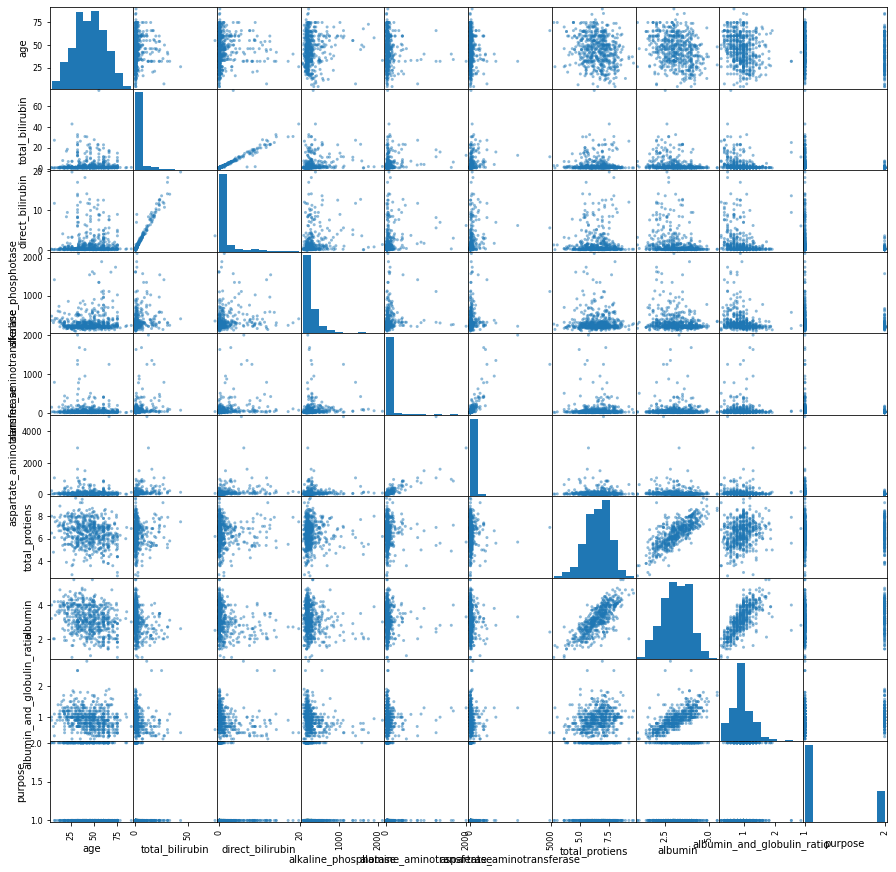

In [23]:
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

•	Самые большие показатели total_protiens, albumin и albumin_and_globulin_ratio имеют люди в возрасте примерно от 20 до 75 лет
•	total_protiens напрямую зависит от albumin
•	Также total_protiens зависит от albumin_and_globulin_ratio
•	Содержание albumin у человека зависит от albumin_and_globulin_ratio

Также отдельно была рассмотрена зависимость total_protiens от albumin

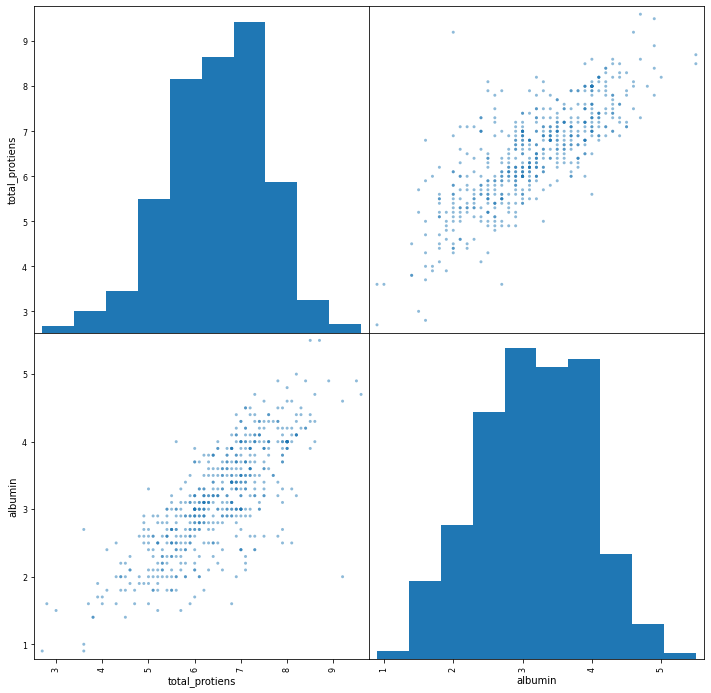

In [24]:
pd.plotting.scatter_matrix(df.iloc [:, 7:9], figsize=(12,12))
plt.show()

Оценка коэффициента корреляции 

In [25]:
df['age'].corr(df['total_protiens'])

-0.19599664168169317

In [26]:
df['age'].corr(df['albumin'])

-0.2724756936518857

In [27]:
df['age'].corr(df['albumin_and_globulin_ratio'])

-0.21963053227110113

In [28]:
df.corr()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,purpose
age,1.000000,0.010895,0.006436,0.082257,-0.084569,-0.020217,-0.195997,-0.272476,-0.219631,-0.134237
total_bilirubin,0.010895,1.000000,0.873981,0.205530,0.216761,0.237342,-0.007713,-0.224492,-0.209099,-0.223277
direct_bilirubin,0.006436,0.873981,1.000000,0.234002,0.236702,0.257086,0.000057,-0.231269,-0.203059,-0.249596
alkaline_phosphotase,0.082257,0.205530,0.234002,1.000000,0.126414,0.168655,-0.026808,-0.163602,-0.234983,-0.182355
alamine_aminotransferase,-0.084569,0.216761,0.236702,0.126414,1.000000,0.791010,-0.034721,-0.027548,-0.007708,-0.160982
aspartate_aminotransferase,-0.020217,0.237342,0.257086,0.168655,0.791010,1.000000,-0.020110,-0.085205,-0.075286,-0.151309
total_protiens,-0.195997,-0.007713,0.000057,-0.026808,-0.034721,-0.020110,1.000000,0.784934,0.234724,0.035429
albumin,-0.272476,-0.224492,-0.231269,-0.163602,-0.027548,-0.085205,0.784934,1.000000,0.686008,0.164689
albumin_and_globulin_ratio,-0.219631,-0.209099,-0.203059,-0.234983,-0.007708,-0.075286,0.234724,0.686008,1.000000,0.172018
purpose,-0.134237,-0.223277,-0.249596,-0.182355,-0.160982,-0.151309,0.035429,0.164689,0.172018,1.000000


Построение тепловой карты корреляции 

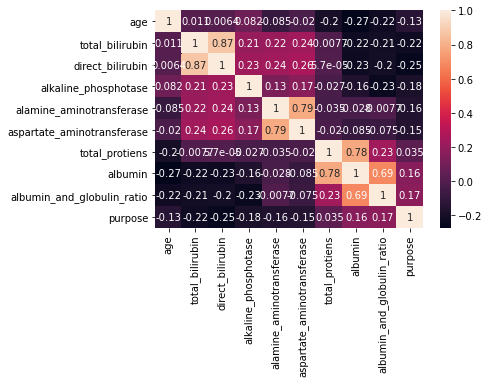

In [29]:
cols = ['age', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'purpose']
num = {} 
row = [] 
for col1 in cols: 
    row.clear() 
    for col2 in cols:  
        row.append(df[col1].corr(df[col2])) 
    num[col1] = np.array(row) 
 
df1 = pd.DataFrame(num, index=cols, columns=cols) 
sns.heatmap(df1, annot=True) 
plt.show()

•	Параметры direct_bilirubin и totalbilirubin очень сильно зависят друг от друга.
•	Параметры alamine_aminotransferase и aspartate_aminotransferase также сильно зависят друг от друга.
•	Парметр albumin достаточно сильно зависит от total_protiens и albumin_and_globulin_ratio.
•	Параметр albumin сильно зависит от возраста в отрицательную сторону 

Целевым призноком в данном датафрейме является столбец purpose, так как он отображает болеет ли человек, исходя из всех данных, представленных в данном датафрейме.

В результате выполнения лабораторной работы был осуществлен поиск зависимостей в обработанных данных. 
В ходе работы была построена и проанализированна точечная диаграмма, с её помощью были найдены выделяющиеся переменные, выявлена зависимость данных переменных друг от друга. Также были найден коэффициент корреляции для зависимости, на ее основании был сделан вывод о существующей зависимости. Была построена тепловая карта корреляции, наглядно показывающая на сколько сильны те или иные зависимости между переменными. 

# Дополнительное задание

**Задание №1**
*Подсчитать ковариацию с помощью cov*

In [48]:
df.cov()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,purpose
age,265.074518,1.116148,0.298033,329.196087,-250.860415,-96.181990,-3.473116,-3.525441,-1.140597,-0.987407
total_bilirubin,1.116148,39.594662,15.640944,317.898170,248.505258,436.393207,-0.052826,-1.122589,-0.419688,-0.634748
direct_bilirubin,0.298033,15.640944,8.088817,163.589862,122.653394,213.651478,0.000177,-0.522711,-0.184213,-0.320715
alkaline_phosphotase,329.196087,317.898170,163.589862,60421.348585,5661.436735,12113.800728,-7.172155,-31.958471,-18.424175,-20.251287
alamine_aminotransferase,-250.860415,248.505258,122.653394,5661.436735,33194.892456,42111.737432,-6.885113,-3.988684,-0.447961,-13.251098
aspartate_aminotransferase,-96.181990,436.393207,213.651478,12113.800728,42111.737432,85382.856851,-6.395769,-19.785793,-7.017076,-19.975096
total_protiens,-3.473116,-0.052826,0.000177,-7.172155,-6.885113,-6.395769,1.184605,0.678924,0.081489,0.017422
albumin,-3.525441,-1.122589,-0.522711,-31.958471,-3.988684,-19.785793,0.678924,0.631544,0.173895,0.059130
albumin_and_globulin_ratio,-1.140597,-0.419688,-0.184213,-18.424175,-0.447961,-7.017076,0.081489,0.173895,0.101745,0.024790
purpose,-0.987407,-0.634748,-0.320715,-20.251287,-13.251098,-19.975096,0.017422,0.059130,0.024790,0.204117


**Задание №2**
*Построить матрицу диаграмм рассеяния по классам, используйте параметр hue = Dataset123 с помощью seaborn parplot*

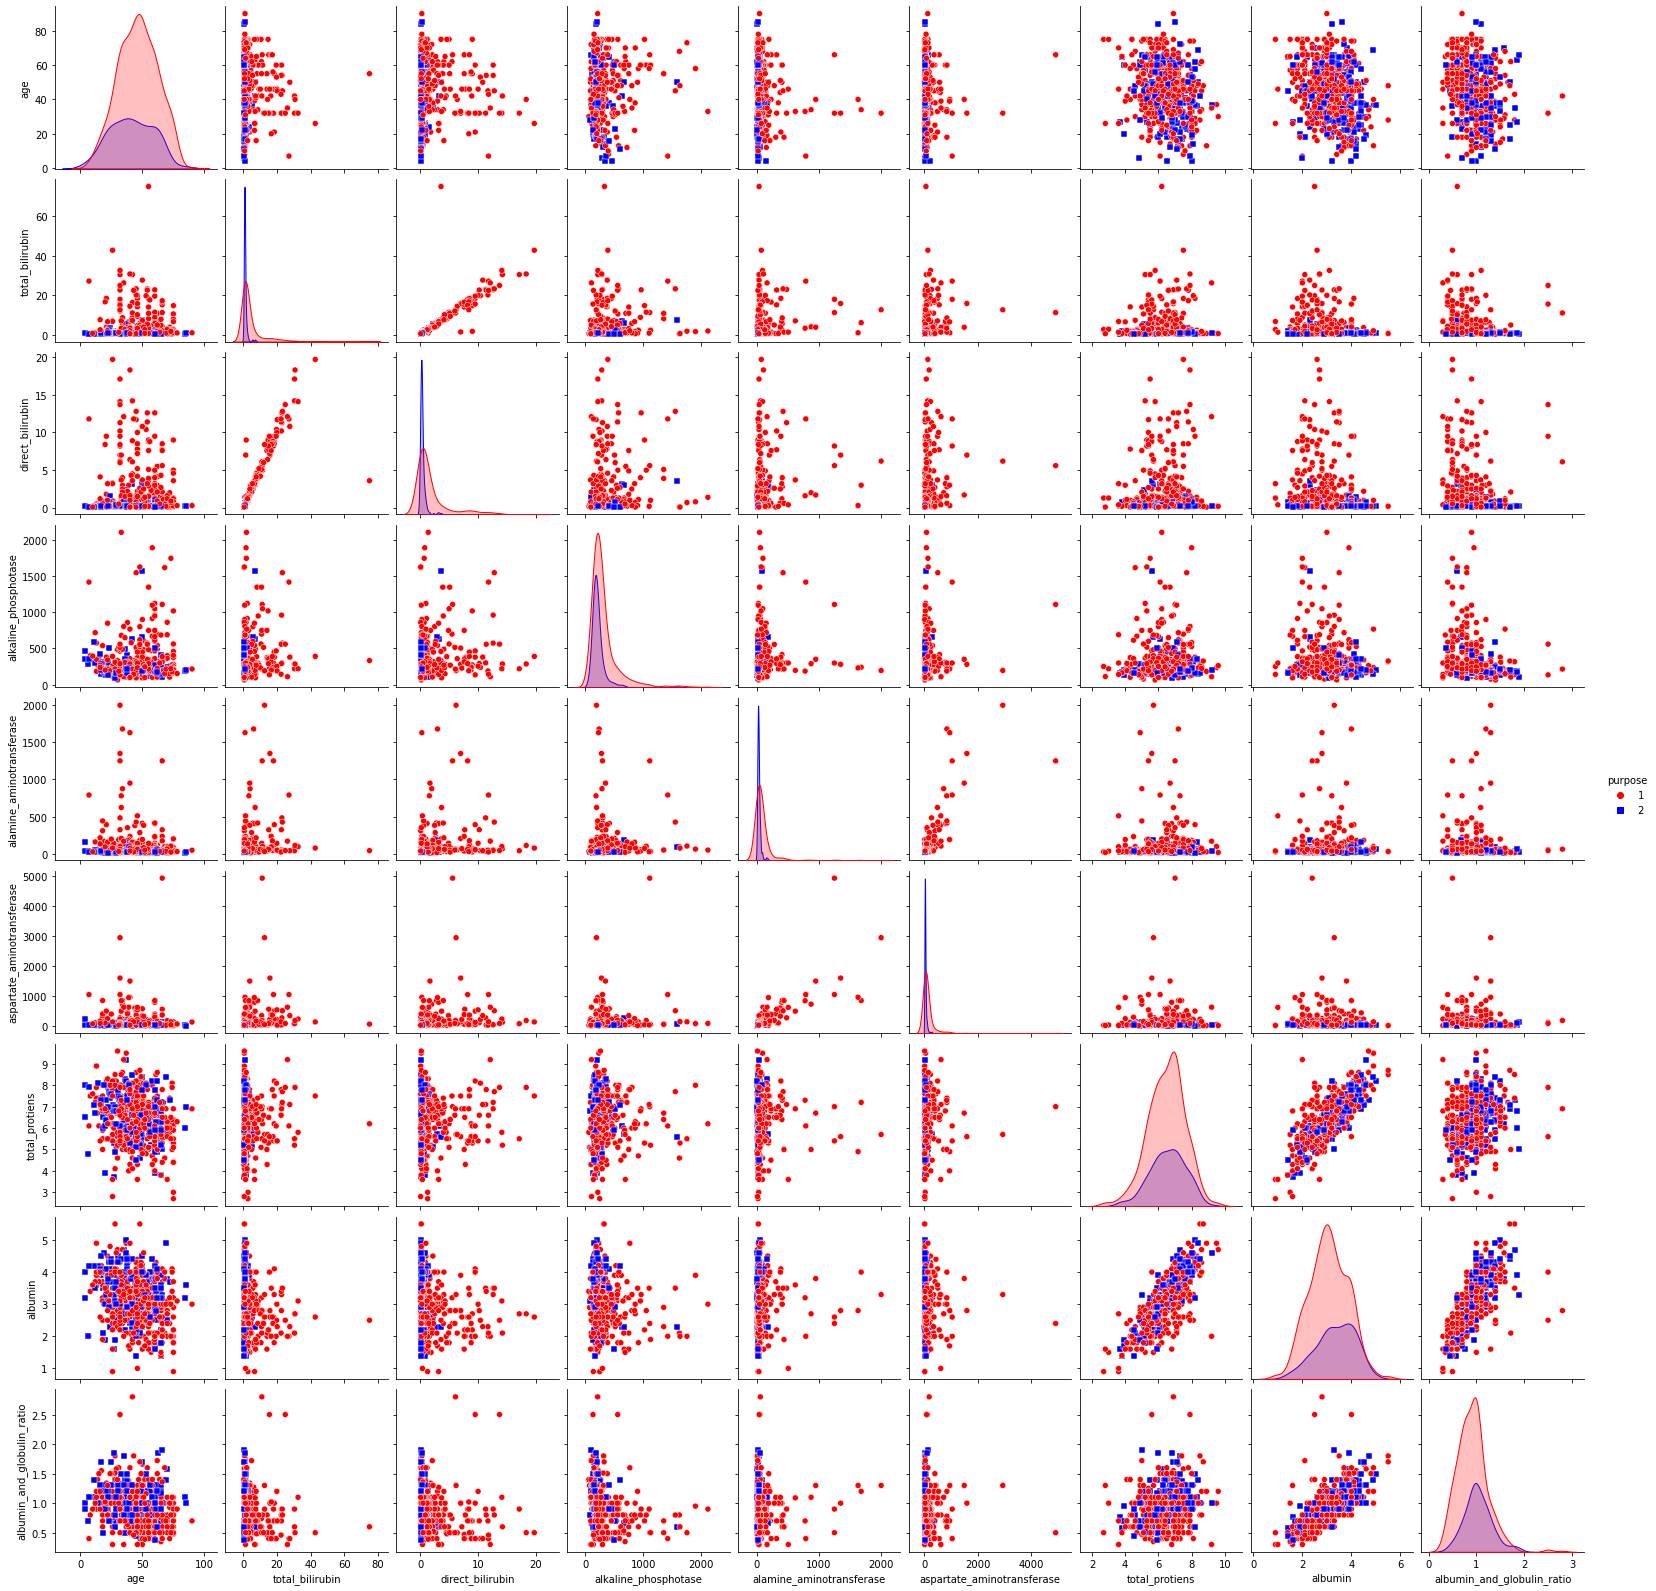

In [51]:
sns.pairplot(df,hue="purpose", palette = ["red", "blue"], markers=["o", "s"])
plt.show()

**Задание №3**
*Построить boxplot любого столбца*

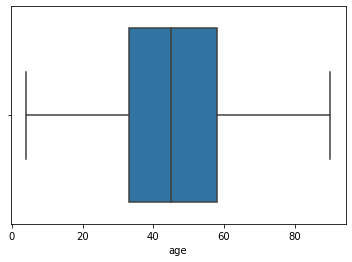

In [30]:
sns.boxplot(x=df["age"]);